## Veri Ön İşleme

- Genel olarak, doğrudan bir kaynaktan gelen veri seti hamdır, yani tutarsızlıklar, yanlış yazılmış değerler, NA değerleri vb.

- Bu gibi durumlarda, modeli daha sonraki adımlarda eğitmeden önce veri ön işleme uygulamak bir zorunluluktur.

- Bir veri kümesini iyileştirme yöntemleri, birkaçını saymak gerekirse, genellikle bazı kayıtları atmayı ve bunları anlamlı değerlerle değiştirmeyi içerir.

- Veri ön işleme adımlarına daha derinlemesine bakalım

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(20, 10)})

### DataFrame'i Yükleme ve İnceleme

- Veri setini yükledikten sonra, değerlerin daha iyi anlaşılması için sütunlarla ilgili basit istatistikler elde etmek çok önemlidir.

In [2]:
df = pd.read_csv("AB_NYC_2019.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.shape

(48895, 16)

In [5]:
df.size

782320

In [6]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### Kullanılmayan Sütunları Bırakma

- Makine öğrenimi modeli eğitimi sırasında bir sütun kullanılmayacaksa, bu sütunların kaldırılması yararlı olacaktır.

- Bu tür sütunları bırakmak, veri kümesinin boyutunu küçültecek ve bu nedenle bellekten tasarruf sağlayacaktır.

In [9]:
df.drop(["name", "id", "host_id", "host_name"], inplace=True, axis=1)
df.head()

,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


## Aykırı Değer Tespiti

- En basit ifadeyle, bir aykırı değer, diğer veri noktalarından oldukça uzakta bulunan/veya veri çerçevesinde görülen modelle tutarlı olmayan bir veridir.

- Giriş hatalarından veya ölçüm hatalarından kaynaklanabilir veya hatta doğal bir aykırı değer olabilir.

- Aykırı değerleri tespit etmek için kullanılan en yaygın yöntem görselleştirmedir ve yaygın olarak kabul edilen "Aykırı değerler, ortalamadan üç veya daha fazla standart sapma uzaktadır" ilkesi bize bir veri noktasının aykırı değer olduğuna dair ipuçları gösterir.

### Aykırı Değer Tespitinin Kahramanı: Z-Skoru

- Z-skoru, belirli bir gözlemin ortalamadan kaç standart sapma uzakta olduğunu gösteren istatistiksel bir ölçümdür.

- Her bir veri noktasının farklı bir Z puanı vardır, ancak veri kümesinin yalnızca tek bir ortalama ve tek bir standart sapma değeri vardır

#### Atama
Atama, eksik veya aykırı değerleri anlamlı verilerle doldurmaktır

In [14]:
integers = ["minimum_nights","number_of_reviews", "calculated_host_listings_count", "availability_365"]

for column in integers:
    
    max_value = (3*df[column].std()) + df[column].mean()  
    # Sütundaki değerlerin "aykırı" olarak adlandırılmayacak maksimum değerini hesaplamak için kullanılır.
    min_value = -((3*df[column].std()) + df[column].mean()) 
    # Sütundaki değerlerin "aykırı" olarak adlandırılmayacak minimum değerini hesaplamak için kullanılır.

    mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean()  
    # koşulunu sağlayan değerlerin sütundaki yeni ortalaması hesaplanır. 
    # Bu işlem, aykırı değerleri dikkate almadan sütundaki değerlerin ortalama değerini bulmaya yöneliktir.

    if mean is not np.nan:  
        # Eğer ortalamada np.nan (sayısal olmayan) bir değer yoksa, aykırı değerlerin yerine ortalamayı koyar ve NaN değerleri de ortalamayla doldurur.
        df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean 
        df[column].fillna(mean, inplace=True) 
    else: 
        # Eğer sütunda aykırı değer yoksa, yani ortalamada np.nan bir değer yoksa, sadece NaN değerleri ortalamayla doldurulur. 
        df[column].fillna(df[column].mean(), inplace=True)  

    df[column] = df[column].astype("int64")  

<Axes: xlabel='price', ylabel='Count'>

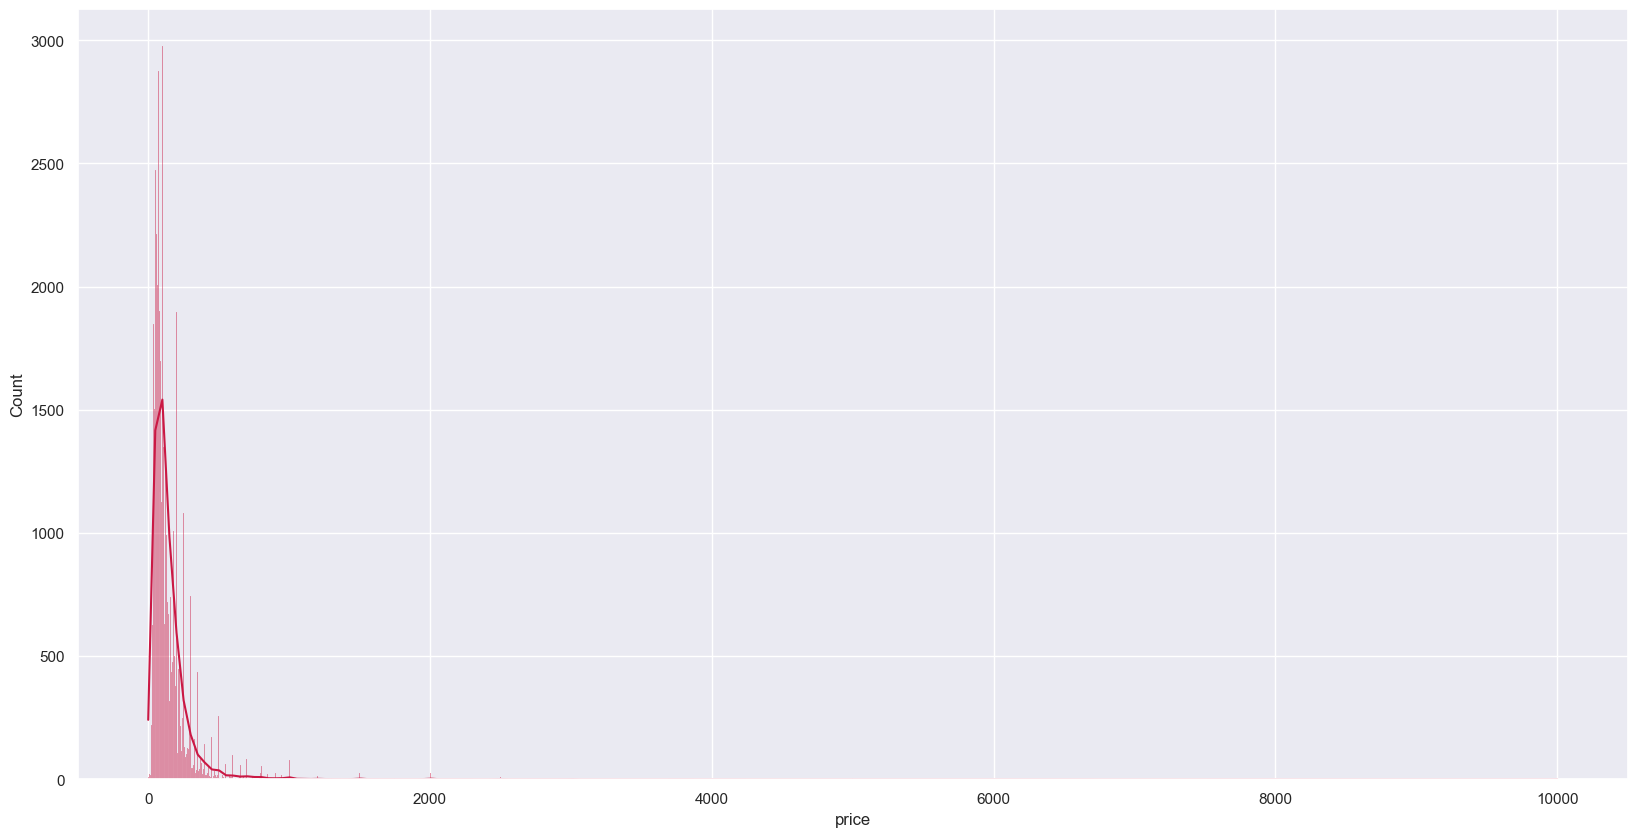

In [15]:
sns.histplot(df["price"], kde=True, color="#ca1844")

In [16]:
floats = ["price", "reviews_per_month", "calculated_host_listings_count", "latitude", "longitude"]

for column in floats:
    df[column] = pd.to_numeric(df[column], errors="coerce")
  
    max_value = (3*df[column].std()) + df[column].mean()  
    min_value = -((3*df[column].std()) + df[column].mean())

    mean = df.loc[(df[column] > min_value) & (df[column] < max_value), column].mean() 

    if mean is not np.nan:  
        df.loc[(df[column] < min_value) | (df[column] > max_value), column] = mean 
        df[column].fillna(mean, inplace=True)  
    else: 
        df[column].fillna(df[column].mean(), inplace=True) 

    df[column] = df[column].astype("float64") 

<Axes: xlabel='price', ylabel='Count'>

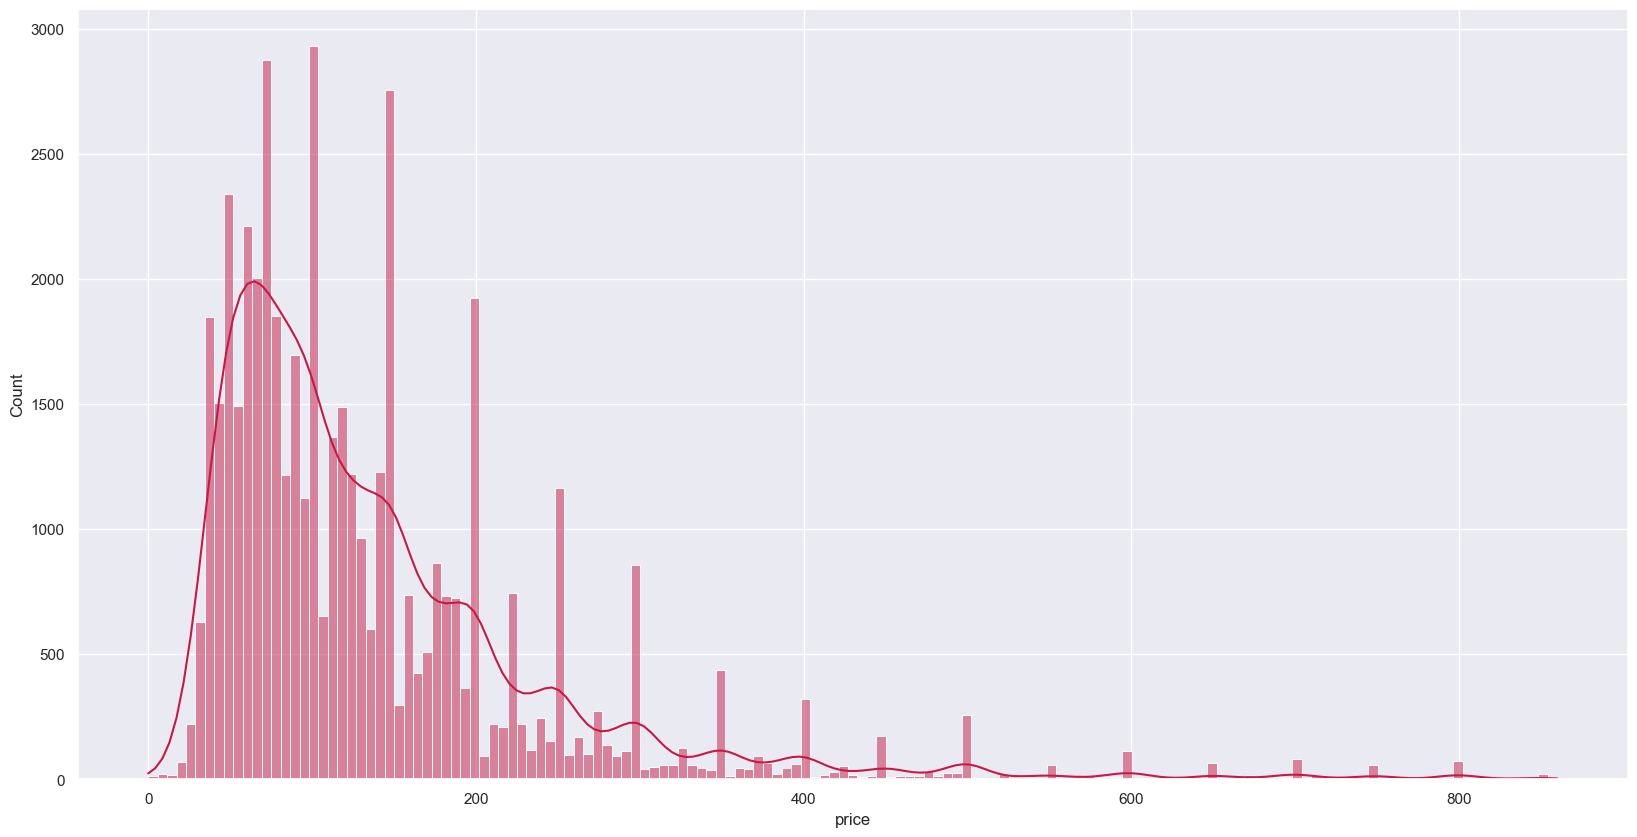

In [17]:
sns.histplot(df["price"], kde=True, color="#ca1844")

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             48895 non-null  object 
 1   neighbourhood                   48895 non-null  object 
 2   latitude                        48895 non-null  float64
 3   longitude                       48895 non-null  float64
 4   room_type                       48895 non-null  object 
 5   price                           48895 non-null  float64
 6   minimum_nights                  48895 non-null  int64  
 7   number_of_reviews               48895 non-null  int64  
 8   last_review                     38843 non-null  object 
 9   reviews_per_month               48895 non-null  float64
 10  calculated_host_listings_count  48895 non-null  float64
 11  availability_365                48895 non-null  int64  
dtypes: float64(5), int64(3), object(

## Eksik kategorik değerleri işleme

In [19]:
df.groupby("room_type")["room_type"].value_counts()

room_type        room_type      
Entire home/apt  Entire home/apt    25409
Private room     Private room       22326
Shared room      Shared room         1160
Name: room_type, dtype: int64

In [23]:
for key, value in df.groupby(by="room_type")["room_type"].value_counts().items():
    # df.groupby(by="room_type")["room_type"].value_counts() ifadesi, "room_type" sütunu üzerinde gruplama yaparak 
    # her bir değerin kaç kez tekrarlandığını sayar.
    # Döngü, items() metodunu kullanarak gruplama sonuçlarını (key, value) çiftleri olarak döner.
    if value == 1:
        # Döngüde, eğer bir değerin tekrar sayısı (value) 1 ise, bu durum nadir görülen bir değeri temsil eder.
        df.loc[df["room_type"] == key[0], "room_type"] = "unknown_type"
df.groupby(by="room_type")["room_type"].value_counts()        

room_type        room_type      
Entire home/apt  Entire home/apt    25409
Private room     Private room       22326
Shared room      Shared room         1160
Name: room_type, dtype: int64

In [24]:
df.isna().sum()

neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                     0
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [30]:
df.loc[df.isna()["last_review"], "last_review"] = "unknown_date"

In [31]:
df.isna().sum()

neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

## Dtype'ları dönüştürme

In [33]:
object_columns = df.select_dtypes("object").columns
object_columns

Index(['neighbourhood_group', 'neighbourhood', 'room_type', 'last_review'], dtype='object')

In [34]:
for column in object_columns:
    df[column] = df[column].astype("category")

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   neighbourhood_group             48895 non-null  category
 1   neighbourhood                   48895 non-null  category
 2   latitude                        48895 non-null  float64 
 3   longitude                       48895 non-null  float64 
 4   room_type                       48895 non-null  category
 5   price                           48895 non-null  float64 
 6   minimum_nights                  48895 non-null  int64   
 7   number_of_reviews               48895 non-null  int64   
 8   last_review                     48895 non-null  category
 9   reviews_per_month               48895 non-null  float64 
 10  calculated_host_listings_count  48895 non-null  float64 
 11  availability_365                48895 non-null  int64   
dtypes: category(4), fl

In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
latitude,48895.0,40.728754,0.054225,40.49979,40.69010,40.72307,40.762995,40.89245
longitude,48895.0,-73.952170,0.046157,-74.24442,-73.98307,-73.95568,-73.936275,-73.71299
price,48895.0,138.746903,107.130617,0.00000,69.00000,106.00000,175.000000,860.00000
minimum_nights,48895.0,5.570835,8.141238,1.00000,1.00000,3.00000,5.000000,30.00000
number_of_reviews,48895.0,12.279415,16.821715,0.00000,1.00000,5.00000,16.000000,79.00000
reviews_per_month,48895.0,1.262148,1.232741,0.01000,0.28000,1.22000,1.480000,6.41000
calculated_host_listings_count,48895.0,1.580153,1.115253,1.00000,1.00000,1.00000,2.000000,7.00000
availability_365,48895.0,112.781327,131.622289,0.00000,0.00000,45.00000,227.000000,365.00000


### Pivot tablo

- DataFrame olarak elektronik tablo stilinde bir pivot tablo oluşturur

In [37]:
df.pivot_table(values=["number_of_reviews", "availability_365", "price"],
               columns="room_type",
               aggfunc=np.mean)

room_type,Entire home/apt,Private room,Shared room
availability_365,111.920304,111.203933,162.000862
number_of_reviews,12.216852,12.451805,10.331897
price,190.404829,83.722141,66.252576
